In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

In [3]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [4]:
fnames = get_image_files(path/"images")
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f00210.png')

In [5]:
(path/"labels").ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/0016E5_06300_P.png')

In [6]:
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

In [7]:
mask = PILMask.create((path/"labels").ls()[0])

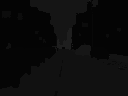

In [8]:
mask

In [9]:
np.array(mask)

array([[ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       ...,
       [17, 17, 17, ..., 17, 17, 17],
       [17, 17, 17, ..., 17, 17, 17],
       [17, 17, 17, ..., 17, 17, 17]], dtype=uint8)

In [10]:
codes = np.loadtxt(path/'codes.txt', dtype=str)

In [11]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [14]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

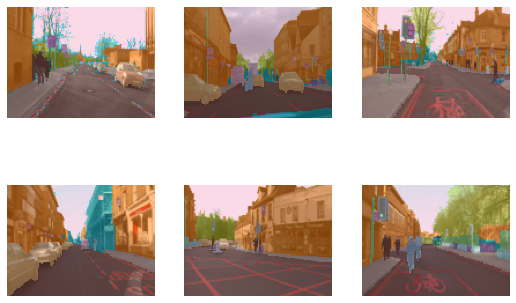

In [15]:
dls.show_batch(max_n=6)

In [16]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.366558,2.600074,00:09


epoch,train_loss,valid_loss,time
0,2.082151,1.845274,00:02
1,1.789328,1.244693,00:02
2,1.589688,1.059909,00:02
3,1.424339,0.943986,00:02
4,1.291785,0.848525,00:01
5,1.185851,0.848222,00:01


In [23]:
test_dl = dls.test_dl(fnames*100)

In [ ]:
test_preds = learn.get_preds(dl=test_dl)